# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [77]:
import numpy as np
import pandas as pd

#ваш код 
df = pd.read_csv('Advertising.csv',index_col=0)

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [78]:
#ваш код 
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [79]:
#ваш код 
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [80]:
#ваш код 
X = X_orig = df.drop(['sales'], axis=1)
y = df['sales']
X=np.array(X)
y=np.array(y) 

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [81]:
#import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [82]:
X_norm = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [83]:
# ваш код 
def coordinate_descent(X, y, num_iter=100):
    cost = 0
    m = X.shape[0] # количество строк в матрице X
    n = X.shape[1] # количество столбцов в матрице X
    w = np.zeros(n) #вектор размера nx1, состояющий из нулей

    for i in range(num_iter):
        for k in range(n):
            # Вычисляем прогноз без k-ого фактора
            h = ((X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])).reshape(-1,1)
            # Обновляем новое значение k-ого коэффициента
            w[k] =  X[:,k].T @ (y - h)
            # Вычисляем функцию потерь
            cost = np.sum((X @ w) - y)**2/(len(y))        
    return w, cost

coordinate_descent(X_norm,y)

(array([ 41.56217205, 110.13144155,  73.52860638,  -0.55006384]),
 3.125957158566315e-18)

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [84]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X_norm, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [107]:
#ваш код

X_scaled=(X_orig-X_orig.mean(axis=0))/X_orig.std(axis=0)

**Добавим единичный столбец**

In [108]:
X_scaled_ones = np.hstack([np.ones(X_scaled.shape[0]).reshape(-1, 1), X_scaled])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [114]:
#ваш код
def mse_error (y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))


**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [118]:
#ваш код

y_pred_naive = np.ones(y.shape[0])*y.mean()

print(f'MSE for naive prediction: {round(mse_error(y,y_pred_naive),4)}')

MSE for naive prediction: 27.0857


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [131]:
#ваш код

def lin_pred(X = X_scaled_ones, w = X_scaled_ones.shape[1]):
    return np.dot(X,w).reshape(-1,1)


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [181]:
#ваш код

def stoch_grad_step(X = X_scaled_ones, y=y, w = np.ones(X_scaled_ones.shape[1]), train_ind = 0, eta=0.1):

    dim = X.shape[1]
    l = len(y)
    delta = np.zeros(dim)
    sumL = 0 

    for j in range(dim):

        # если реализовывать предложенную выше формулу (см.в ячейке 37: обратите внимание на сумму x(i,j) от i=1 до L)
        # эта формула очевидно не зависит от объекта обучающей выборки train_ind - зачем нам этот параметр???

        #for i in range(l):
        #    sumL  += X[i,j] * (np.dot(X[i],w)-y[i])
        #delta[j] = 2 * eta/l * sumL

        # если считать градиент только по одной строке - вероятно есть риск сходимости ???
    
        i = train_ind
        delta[j] =  2*eta/l*X[i,j] * (np.dot(X[i],w)-y[i])

    return w - delta

# print (stoch_grad_step(X, y, np.array([1,1,1,1]), 199, eta=0.01))


**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [267]:
# ваш код

def stochastic_gradient_descent(X, y, w, eta=1e-2, max_iter=1e4,
                                min_w_distance=1e-8, seed=42, verbose=False):
   
    w_distance = np.inf

    #w = np.array(w).reshape(-1,1)
    
    err_logs = []

    iter_num = 0

    np.random.seed(seed)

    while w_distance > min_w_distance and iter_num < max_iter:
        random_ind = np.random.randint(X.shape[0])
        new_w = stoch_grad_step(X, y, w, random_ind, eta)
        iter_num += 1
        y_pred = lin_pred(X, w)
        w_distance = np.linalg.norm(new_w - w)
        err_logs.append(mse_error(y, y_pred))
        w = new_w
        #errors.append(mserror(y, linear_prediction(X, new_w)))
        
    return w, err_logs
w_sgd,err = stochastic_gradient_descent(X=X_scaled_ones,y=y, w=np.zeros(4),eta=0.01, max_iter=10e5)

#print(w_sgd)
#print(err[-5:])




 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [268]:
# baseline для X_scaled_ones

from sklearn.linear_model import LinearRegression
 
model1 = LinearRegression(fit_intercept=False)
model1.fit(X_scaled_ones, y)
 
print(model1.coef_)

[[14.022500000000004    3.9290886857956906   2.799069185164442
  -0.02259516759469704]]


**Постройте график зависимости ошибки от номера итерации**

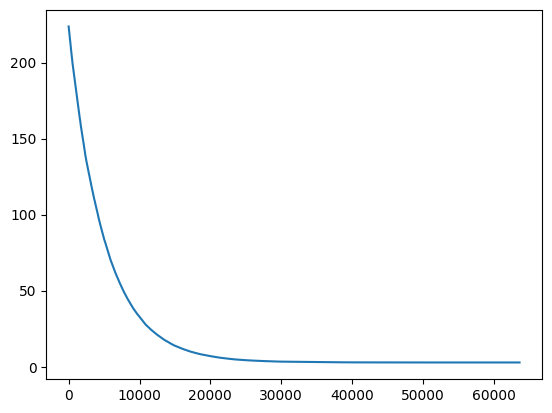

In [270]:
# ваш код
import matplotlib.pyplot as plt
 
plt.plot(err)
plt.show()


**Выведите вектор весов, к которому сошелся метод.**

In [271]:
# ваш код
np.set_printoptions(suppress=True)
print('W = ', w_sgd.round(4))

W =  [13.9904  3.8917  2.7923  0.0062]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [272]:
# ваш код

print(f'Last error: {err[-1].round(4)}')

Last error: 2.7872
